# Classification 1

Logistic Regression dan KNN

In [1]:
# Example 1

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# create dummy data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [4]:
# build a default model
# binary & small data : liblinear(default)
# big data : sab & saga
# multiclass : newton, lbfgs, saga

model = LogisticRegression(solver='liblinear')

In [5]:
model.fit(x, y)

LogisticRegression(solver='liblinear')

In [6]:
model.classes_

array([0, 1])

In [7]:
# to get actual data we can use predict proba
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
# get accuracy
model.score(x, y)

0.9

there's one mistake in the prediction(1)

In [11]:
# check the prediction
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

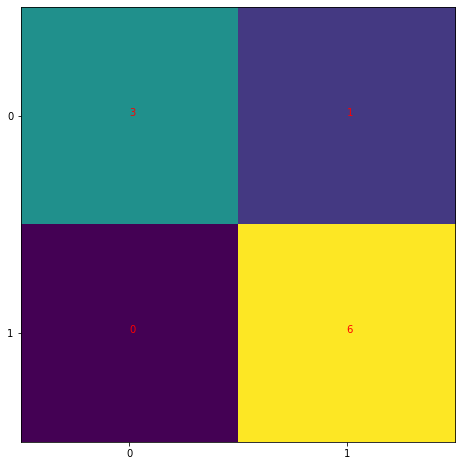

In [16]:
# visualize confusion matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm) 
ax.grid(False) # clear the grid
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))

# get the confusion matrix number
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
        
plt.show()

In [17]:
# use print function to get good result
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [18]:
# let's look the difference
classification_report(y, model.predict(x))

'              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86         4\n           1       0.86      1.00      0.92         6\n\n    accuracy                           0.90        10\n   macro avg       0.93      0.88      0.89        10\nweighted avg       0.91      0.90      0.90        10\n'

In [20]:
# improve the model
# mengubah parameter saja bisa mempengaruhi hasil
model = LogisticRegression(solver='liblinear', C=10.0)

In [21]:
model.fit(x, y)

LogisticRegression(C=10.0, solver='liblinear')

In [22]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [23]:
model.score(x, y)

1.0

no mistake prediction

In [25]:
# Example 2

In [27]:
from sklearn.datasets import load_digits # transform image to text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
x, y = load_digits(return_X_y = True)

In [30]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [31]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [44]:
# we can set the random_state(it's can influence the accuracy)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [37]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

In [38]:
x_train

array([[ 0.        , -0.33438195, -0.04714993, ..., -0.47270255,
        -0.5019783 , -0.19328422],
       [ 0.        , -0.33438195, -0.67840251, ..., -1.14809261,
        -0.5019783 , -0.19328422],
       [ 0.        ,  0.79888894,  0.37368513, ..., -0.64155006,
        -0.5019783 , -0.19328422],
       ...,
       [ 0.        , -0.33438195,  1.63619029, ..., -0.13500751,
        -0.5019783 , -0.19328422],
       [ 0.        ,  7.59851428,  2.26744287, ..., -1.14809261,
        -0.5019783 , -0.19328422],
       [ 0.        , -0.33438195, -1.09923756, ...,  1.55346765,
         1.4920585 , -0.19328422]])

In [39]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [40]:
x_test = scaler.fit_transform(x_test)

In [41]:
y_pred = model.predict(x_test)

In [45]:
model.score(x_test, y_test)

0.8361111111111111

In [46]:
confusion_matrix(y_test, y_pred)

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 34,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 43,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

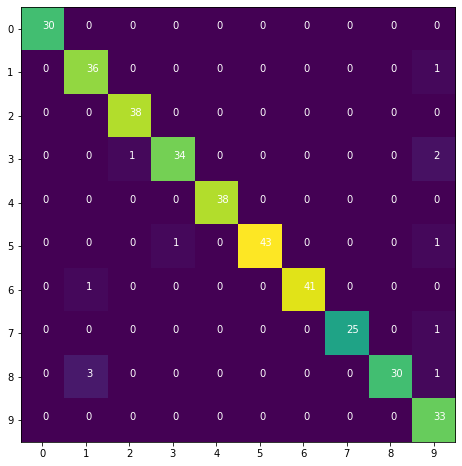

In [47]:
# visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm) 
ax.grid(False) # clear the grid

ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))

# get the confusion matrix number
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], color='white')
        
plt.show()

- semakin kuning prediksi semakin tepat(43).

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.90      0.97      0.94        37
           2       0.97      1.00      0.99        38
           3       0.97      0.92      0.94        37
           4       1.00      1.00      1.00        38
           5       1.00      0.96      0.98        45
           6       1.00      0.98      0.99        42
           7       1.00      0.96      0.98        26
           8       1.00      0.88      0.94        34
           9       0.85      1.00      0.92        33

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



- dari 360 data, prediksi sudah cukup baik dengan akurasi sebesar 97%
- angka 0 diprediksi benar semua, maka precision dan recall hasilnya 1
- angka 1 ada yg salah, sehingga
- model yg bagus utk prediksi angka 0, 4

KNN

In [51]:
# Example 1

In [52]:
# assigning label and features 
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast']

temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']

In [53]:
# label & coding = to translate categorical data to numeric

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0]


In [55]:
temp_encoded = le.fit_transform(temp)

label = le.fit_transform(play)

print(temp_encoded, label)

[1 1 1 2 0 0 0] [0 0 1 1 1 0 1]


In [56]:
# combine data
features = list(zip(weather_encoded, temp_encoded))

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# set parameter k

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

In [61]:
model.predict([[0, 2]])

array([1], dtype=int64)

In [62]:
# Example 2

In [63]:
from sklearn import datasets

wine = datasets.load_wine()

In [64]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [65]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [66]:
# win.data(x), wine.target(y)

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [67]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7037037037037037

In [70]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.6851851851851852

In [71]:
error =[]

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
print(error)

[0.25925925925925924, 0.35185185185185186, 0.2962962962962963, 0.2777777777777778, 0.2962962962962963, 0.2777777777777778, 0.3148148148148148, 0.3333333333333333, 0.2962962962962963, 0.3333333333333333, 0.2962962962962963, 0.2777777777777778, 0.25925925925925924, 0.2777777777777778, 0.2777777777777778, 0.25925925925925924, 0.25925925925925924, 0.25925925925925924, 0.24074074074074073, 0.24074074074074073, 0.25925925925925924, 0.25925925925925924, 0.2777777777777778, 0.2962962962962963, 0.24074074074074073, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2777777777777778, 0.2962962962962963, 0.3148148148148148, 0.2962962962962963, 0.3148148148148148, 0.2962962962962963, 0.2962962962962963, 0.3148148148148148, 0.3148148148148148]


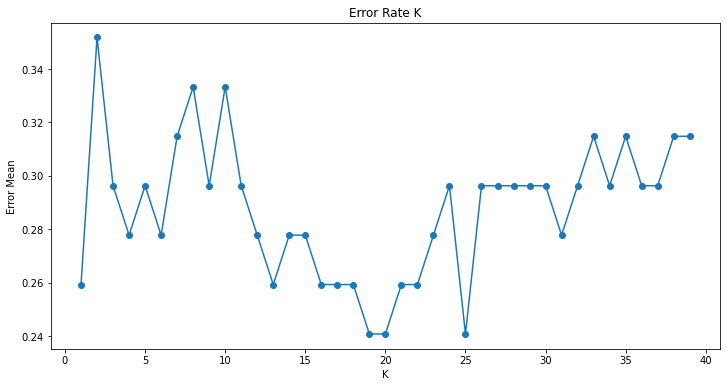

In [74]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), 
         error,
        marker='o')

plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')

plt.show()

In [75]:
model = KNeighborsClassifier(n_neighbors=19)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.7592592592592593

In [76]:
model = KNeighborsClassifier(n_neighbors=20)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.7592592592592593

In [77]:
model = KNeighborsClassifier(n_neighbors=25)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.7592592592592593

In [78]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.6481481481481481